In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
import numpy as np

In [3]:
rent = pd.read_csv("rent_clean.csv")
rent.head()

,Unnamed: 0,Zone,Rent,Area,Yearly rent,Number of bedrooms
0,0,1,564.0,56.0,6768.0,1
1,1,1,700.0,61.0,8400.0,1
2,2,1,1080.0,113.0,12960.0,3+
3,3,1,1131.0,127.0,13572.0,3+
4,4,1,420.0,27.0,5040.0,Studio


In [4]:
rent.drop(columns="Unnamed: 0",inplace=True)

In [5]:
rent.rename(columns = {"Number of bedrooms":"bedrooms"},inplace=True)
rent

,Zone,Rent,Area,Yearly rent,bedrooms
0,1,564.0,56.0,6768.0,1
1,1,700.0,61.0,8400.0,1
2,1,1080.0,113.0,12960.0,3+
3,1,1131.0,127.0,13572.0,3+
4,1,420.0,27.0,5040.0,Studio
...,...,...,...,...,...
899,6,550.0,67.0,6600.0,2
900,6,547.0,60.0,6564.0,1
901,6,517.0,49.0,6204.0,1
902,6,561.0,55.0,6732.0,1


In [6]:
airbnb = pd.read_csv("airbnb_final.csv")
airbnb.drop(columns="Unnamed: 0",inplace=True)
airbnb.head(5)

,id,host_id,room_type,bedrooms,price,count of reviews,days of occupancy,Yearly income,Zone,latitude,longitude,geometry
0,317273,1156398,Entire home/apt,1,155,7,42,6510,1,44.84734,-0.58034,POINT (-0.58034 44.84734)
1,317658,1156398,Entire home/apt,2,195,18,108,21060,1,44.83815,-0.56989,POINT (-0.56989 44.83815)
2,333031,1697156,Entire home/apt,Studio,79,32,192,15168,1,44.84267,-0.57656,POINT (-0.5765600000000001 44.84267)
3,365993,1847986,Entire home/apt,2,85,9,54,4590,5,44.81267,-0.55762,POINT (-0.55762 44.81267)
4,400306,1998044,Entire home/apt,1,60,8,48,2880,3,44.84390,-0.55831,POINT (-0.5583100000000001 44.8439)


Let's plot the distribution of revenues for each zone

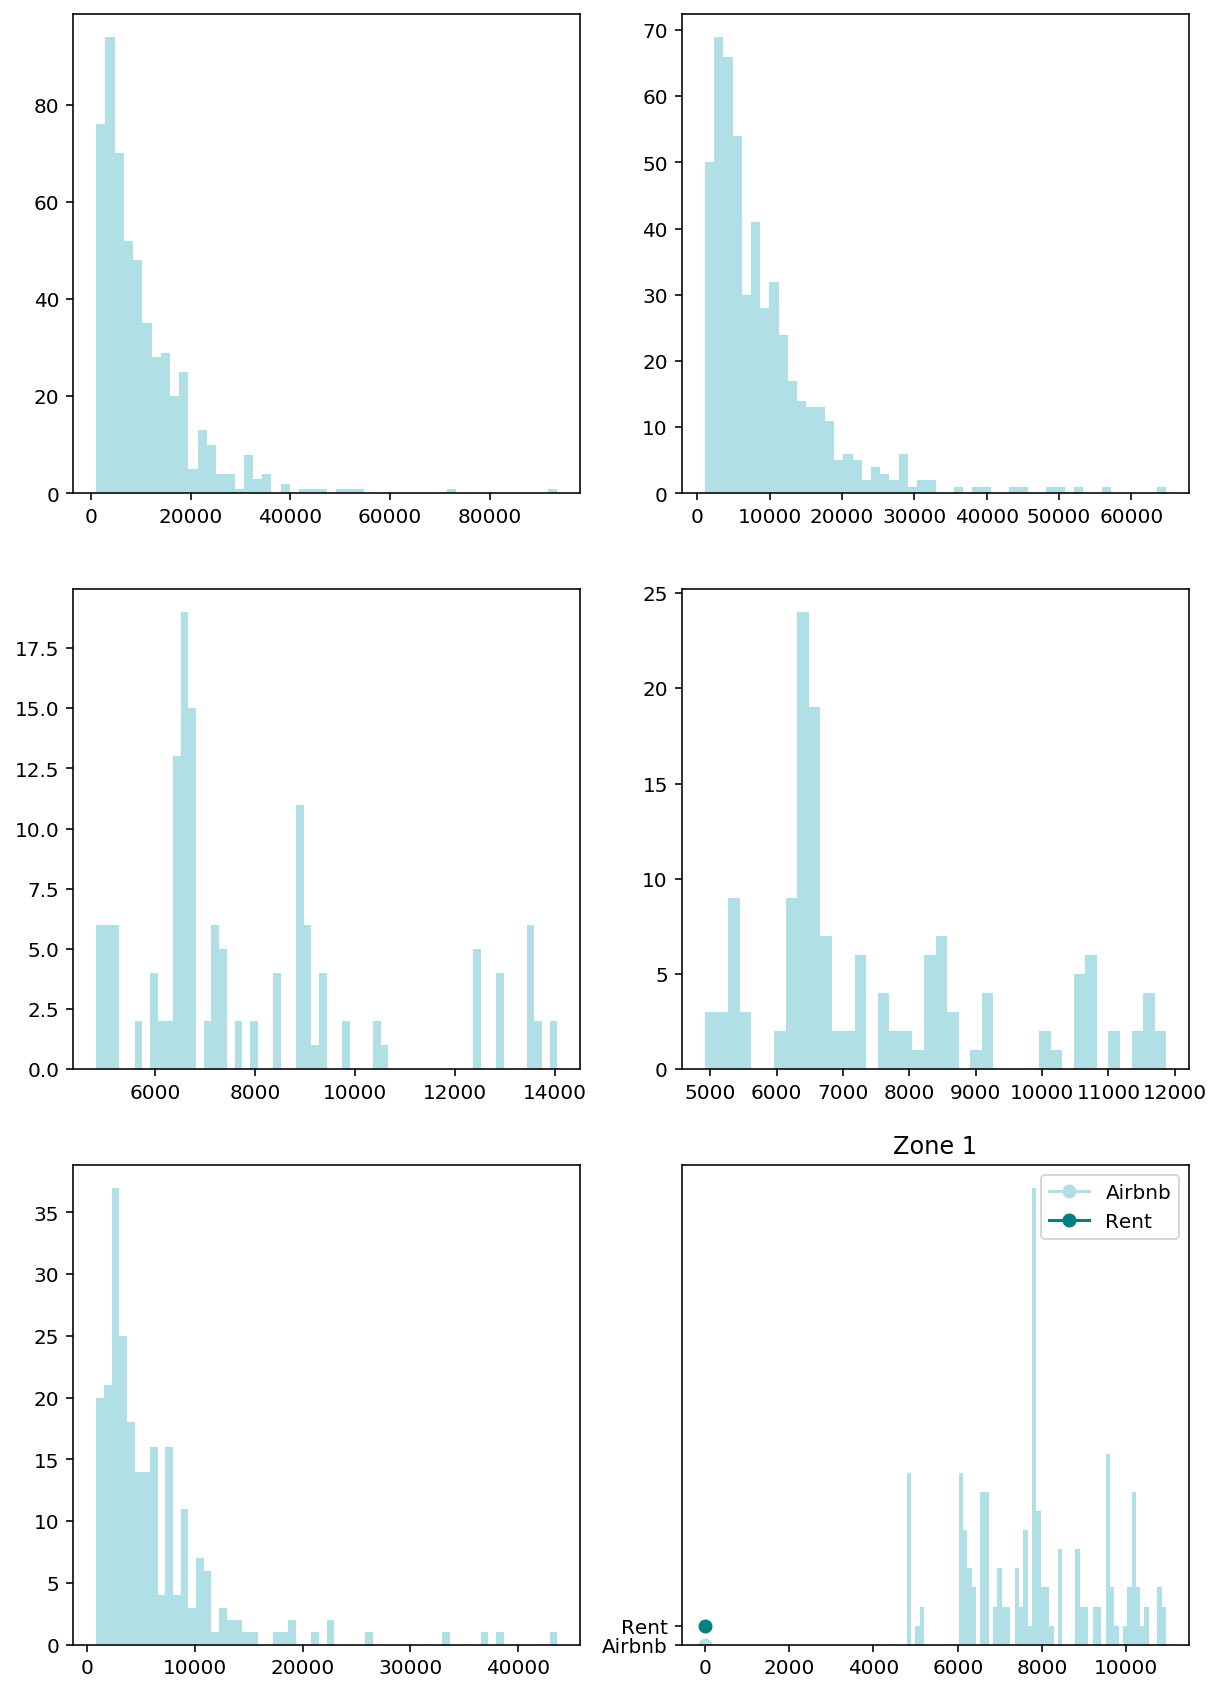

In [61]:


a1=airbnb["Yearly income"].loc[airbnb.Zone == 1]
a2=airbnb["Yearly income"].loc[airbnb.Zone == 2]
a3=airbnb["Yearly income"].loc[airbnb.Zone == 3]
a4=airbnb["Yearly income"].loc[airbnb.Zone == 4]
a5=airbnb["Yearly income"].loc[airbnb.Zone == 5]
a6=airbnb["Yearly income"].loc[airbnb.Zone == 6]

r1=rent["Yearly rent"].loc[rent.Zone == 1]
r2=rent["Yearly rent"].loc[rent.Zone == 2]
r3=rent["Yearly rent"].loc[rent.Zone == 3]
r4=rent["Yearly rent"].loc[rent.Zone == 4]
r5=rent["Yearly rent"].loc[rent.Zone == 5]
r6=rent["Yearly rent"].loc[rent.Zone == 6]


fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10,15))

axs[0,0].hist(a1, linestyle='-', color = 'powderblue',bins=50)
axs[0,1].hist(a2, linestyle='-', color = 'powderblue',bins=50)

axs[1,0].hist(r1, linestyle='-', color = 'powderblue',bins=60)
axs[1,1].hist(r2, linestyle='-', color = 'powderblue',bins=40)

axs[2,0].hist(a6, linestyle='-', color = 'powderblue',bins=60)
axs[2,1].hist(r6, linestyle='-', color = 'powderblue',bins=60)

plt.plot('Airbnb', data = a1, linestyle='-', marker='o', color = 'powderblue')
plt.plot('Rent', data = r1, linestyle='-', marker='o', color = 'teal')
plt.legend()
plt.title('Zone 1')
plt.show()

In [20]:

test = pd.concat([airbnb, rent], sort=False)
test.head(5)
#test.to_csv("C:/Users/tvpia/Desktop/PROJECT 6/Project-Week-6/your-project/concatted.csv")

In [9]:
test.pivot_table(index="Zone",values=["Yearly income","Yearly rent"],columns="bedrooms",aggfunc={'mean','median','std','count'})

Yearly income                                            \
                 count                        mean                 
bedrooms             1   2  3+ Studio            1             2   
Zone                                                               
1                  322  95  59     63  7871.155280  13771.200000   
2                  317  75  56     62  7753.621451  11246.373333   
3                  233  59  36     34  6138.772532   8379.220339   
4                  179  64  30     28  5680.569832   9464.625000   
5                  265  66  50     42  5463.788679   7959.151515   
6                  160  35  24     19  4957.962500   6999.657143   

                                                      ...   Yearly rent  \
                                     median           ...          mean   
bedrooms            3+       Studio       1        2  ...            3+   
Zone                                                  ...                 
1         21790.949153  8068.158730  6267.0  10560.0  ...  12589.000000   
2         18026.821429  6861.161290  5700.0   9240.0  ...  10912.000000   
3         14526.388889  6247.764706  4864.0   6300.0  ...  10888.615385   
4         14421.266667  5361.071429  4386.0   6870.0  ...  10951.111111   
5         14483.240000  6769.857143  3960.0   5940.0  ...  10433.368421   
6         12529.750000  6685.368421  3579.0   6240.0  ...   9447.661017   

                                                                    \
                       median                                  std   
bedrooms       Studio       1       2       3+  Studio           1   
Zone                                                                 
1         5018.000000  6630.0  8928.0  12960.0  5040.0  568.665229   
2         5290.000000  6600.0  8400.0  10692.0  5340.0  494.546832   
3         4731.428571  6564.0  8364.0  11178.0  4800.0  458.626976   
4         5052.800000  6600.0  8436.0  10800.0  5064.0  774.703253   
5         4972.285714  6480.0  8280.0  10500.0  4968.0  611.862730   
6         4858.800000  6360.0  7800.0   9600.0  4800.0  547.016849   

                                               
                                               
bedrooms           2           3+      Studio  
Zone                                           
1         419.559707  1334.063814  128.997948  
2         466.222936   550.724424  187.185972  
3         300.993432  1056.954534  241.827329  
4         637.788022  1006.725894   70.039989  
5         495.218299   699.328652   77.570245  
6         409.932502  1023.094505  114.605410  

[6 rows x 32 columns]

#### The investors are curious as to which  

In [10]:
piv_summ =test.pivot_table(index="Zone",values=["Yearly income","Yearly rent","bedrooms"],aggfunc={"bedrooms":'count',"Yearly income":'mean',"Yearly rent":'mean'})
piv_summ

,Yearly income,Yearly rent,bedrooms
Zone,,,
1,10457.766234,7893.295775,681
2,9286.803922,7518.797203,653
3,7348.292818,7425.986577,511
4,7326.598007,7753.440000,451
5,7048.945626,7871.844156,577
6,6159.655462,7832.313253,404


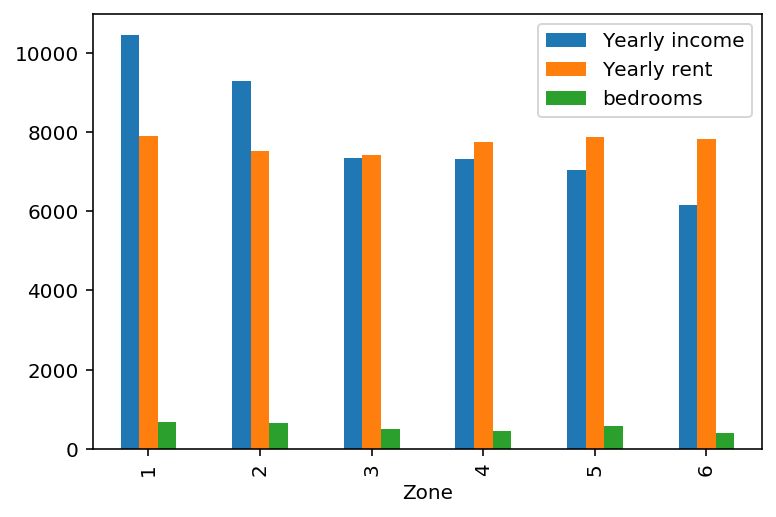

In [11]:
piv_summ.plot.bar()

In [12]:
piv_summa =test.pivot_table(index="bedrooms",values=["Yearly income","Yearly rent","Zone"],aggfunc={"Zone":'count',"Yearly income":'mean',"Yearly rent":'mean'})
piv_summa

,Yearly income,Yearly rent,Zone
bedrooms,,,
1,6558.769648,6687.059406,1880
2,10208.487310,8256.291262,600
3+,16767.184314,10589.333333,453
Studio,6885.387097,4988.500000,344


In [13]:
test.Zone.value_counts()

1    681
2    653
5    577
3    511
4    451
6    404
Name: Zone, dtype: int64

In [14]:
test.bedrooms.value_counts()

1         1880
2          600
3+         453
Studio     344
Name: bedrooms, dtype: int64

In [22]:
correlations
between zones


SyntaxError: invalid syntax (<ipython-input-22-ab4f8e18d075>, line 2)